# 不均一分散と人口

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices

figsize = (10, 5)

In [2]:
path = '../../data/processed/df_filtered.xlsx'
df = pd.read_excel(path)

In [5]:
df['std_log_pop_star_per_islands'] = df.groupby('island_ids')['log_pop_star'].std().loc[df['island_ids']].values

In [7]:
df['std_log_pop_star_per_islands']

0       0.083764
1       0.083764
2       0.083764
3       0.083764
4       0.083764
          ...   
1708    0.181214
1709    0.181214
1710    0.181214
1711    0.181214
1712    0.181214
Name: std_log_pop_star_per_islands, Length: 1713, dtype: float64

<Axes: xlabel='log_pop_star', ylabel='std_log_pop_star_per_islands'>

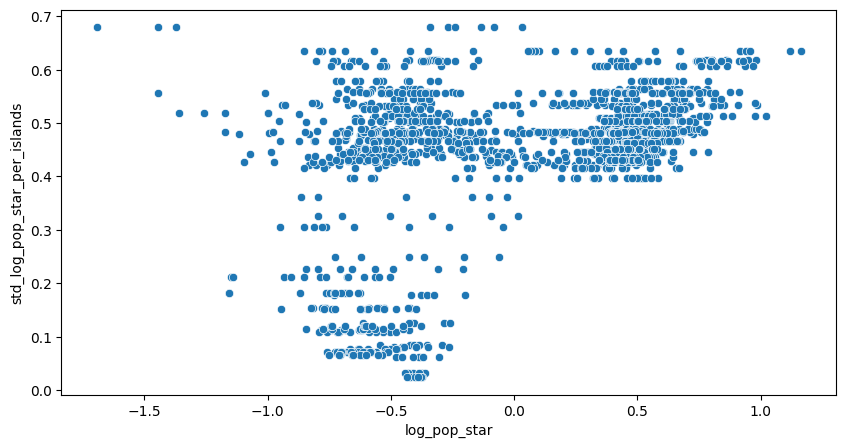

In [9]:
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x ='log_pop_star', y='std_log_pop_star_per_islands', data=df, ax=ax)

(array([ 22.,  77.,  44.,  33.,  24.,  13.,  22.,   0.,  11.,  11.,  11.,
         54., 311., 377., 270., 173., 135.,  27.,  87.,  11.]),
 array([0.02464056, 0.05738504, 0.09012952, 0.122874  , 0.15561847,
        0.18836295, 0.22110743, 0.25385191, 0.28659639, 0.31934087,
        0.35208534, 0.38482982, 0.4175743 , 0.45031878, 0.48306326,
        0.51580774, 0.54855221, 0.58129669, 0.61404117, 0.64678565,
        0.67953013]),
 <BarContainer object of 20 artists>)

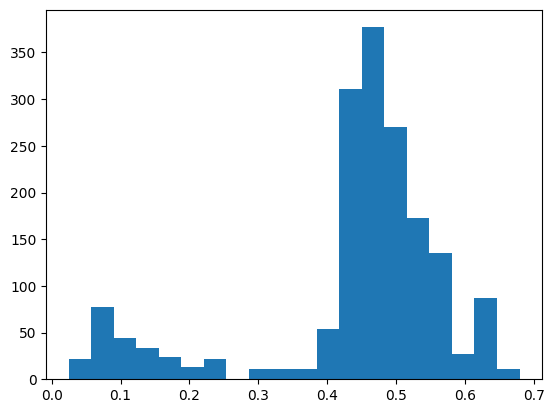

In [58]:
plt.hist(df['std_log_pop_star_per_islands'], bins=20)

In [92]:
y, X = dmatrices('std_log_pop_star_per_islands ~ log_pop_star + after_treatment + area_km2', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())
y_pred = results.predict(X)
residuals = df.std_log_pop_star_per_islands - y_pred

                                 OLS Regression Results                                 
Dep. Variable:     std_log_pop_star_per_islands   R-squared:                       0.290
Model:                                      OLS   Adj. R-squared:                  0.289
Method:                           Least Squares   F-statistic:                     186.3
Date:                          Wed, 08 Jan 2025   Prob (F-statistic):          1.10e-103
Time:                                  16:04:25   Log-Likelihood:                 1247.1
No. Observations:                          1615   AIC:                            -2486.
Df Residuals:                              1611   BIC:                            -2465.
Df Model:                                     3                                         
Covariance Type:                            HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------

Text(0, 0.5, 'Standard deviation of log population of stars per island')

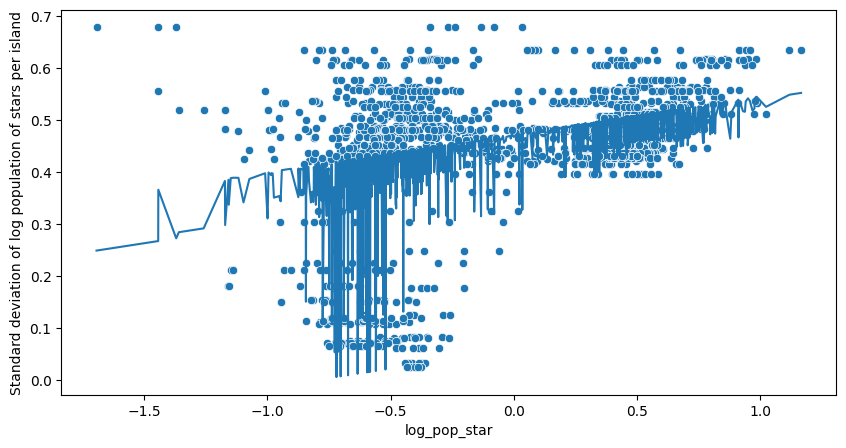

In [88]:
fig, ax = plt.subplots(figsize=figsize)
sns.scatterplot(x ='log_pop_star', y='std_log_pop_star_per_islands', data=df, ax=ax)
sns.lineplot(x='log_pop_star', y=y_pred, data=df, ax=ax)
ax.set_ylabel('Standard deviation of log population of stars per island')

被説明変数が対数人口であり、誤差分散が人口の大きさに依存する場合、誤差分散を人口の関数としてモデル化することができます。以下に、その場合の数式を示します。

モデルの数式
被説明変数 $\log(Y_{it})$ が対数人口であり、誤差分散が人口 $Y_{it}$ に依存する場合、次のようなモデルを考えることができます。

$$ \log(Y_{it}) = \alpha + X_{it}\beta + \epsilon_{it} $$

ここで、誤差項 $\epsilon_{it}$ は次のようにモデル化されます：

$$ \epsilon_{it} \sim N(0, \sigma_{it}^2) $$

誤差分散 $\sigma_{it}^2$ は人口 $Y_{it}$ の関数として次のように表されます：

$$ \sigma_{it}^2 = \sigma^2 \cdot f(Y_{it}) $$

ここで、$f(Y_{it})$ は人口 $Y_{it}$ に依存する関数です。例えば、人口に比例する場合は次のように表されます：

$$ \sigma_{it}^2 = \sigma^2 \cdot Y_{it} $$